In [1]:
from sklearn import preprocessing
#from sklearn.preprocessing import LabelEncoder
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Loading in our data set 
1. Preview the columns
2. View the first 300 rows
3. Rename our columns

In [2]:
df = pd.read_csv('../data.csv', encoding="latin-1")
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country':'Country_Code','country_txt':'Country_Name','region':'Region_Code','region_txt':'Region_Name','city':'City','attacktype1':'AttackType_Code','attacktype1_txt':'AttackType_Name','targtype1':'Targtype_Code','targtype1_txt':'Targtype_Name','gname':'Group_Name','weaptype1':'Weaptype1_Code','weaptype1_txt':'Weaptype1_Name','nkill':'Killed','nwound':'Wounded'},inplace=True)
df=df[['Year','Month','Day','Country_Code','Country_Name','Region_Code','Region_Name','City','AttackType_Code','AttackType_Name','Targtype_Code','Targtype_Name','Group_Name','Weaptype1_Code','Weaptype1_Name','Killed','Wounded']]
df.head(3)

,Year,Month,Day,Country_Code,Country_Name,Region_Code,Region_Name,City,AttackType_Code,AttackType_Name,Targtype_Code,Targtype_Name,Group_Name,Weaptype1_Code,Weaptype1_Name,Killed,Wounded
0,1970,7,2,58,Dominican Republic,2,Central America & Caribbean,Santo Domingo,1,Assassination,14,Private Citizens & Property,MANO-D,13,Unknown,1.0,0.0
1,1970,0,0,130,Mexico,1,North America,Mexico city,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),23rd of September Communist League,13,Unknown,0.0,0.0
2,1970,1,0,160,Philippines,5,Southeast Asia,Unknown,1,Assassination,10,Journalists & Media,Unknown,13,Unknown,1.0,0.0


# KNN Classifier
1. Encode our column data to numerical data
2. We'll use the terrorist group name, amount of victims wounded and victims killed for our inputs

In [3]:
label_encoder = preprocessing.LabelEncoder()

# columns
df['Group_Name']= label_encoder.fit_transform(df['Group_Name'])
df['Wounded']= label_encoder.fit_transform(df['Wounded'])
df['Killed']= label_encoder.fit_transform(df['Killed'])

In [4]:
def start_knn(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=41)
    ss = StandardScaler()
    X_train = ss.fit_transform(X_train)
    X_test = ss.transform(X_test)
    graph = {}
    
    # training cycles
    for i in range(1, 31):
        classifier = KNeighborsClassifier(n_neighbors=i)
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        ac = accuracy_score(y_test, y_pred)
        graph[i] = ac*100
        
    plt.plot(list(graph.keys()), list(graph.values()), color='blue', marker='o')
    plt.title('Key value graph')
    plt.xlabel('Key Values ')
    plt.ylabel('Accuracy (%)')
    plt.show()
    
    max_key = max(graph, key=graph.get)
    print("Our max accuracy: ", graph[max_key], '% at k = ', max_key)
    


# Testing the classifier
1. Feed input today to model
2. Look at the results

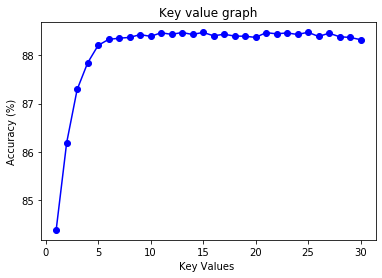

Our max accuracy:  88.48069567131732 % at k =  25


In [5]:
X = df.iloc[:,[3,8,10]].values
y = df.iloc[:, 13].values
start_knn(X, y)

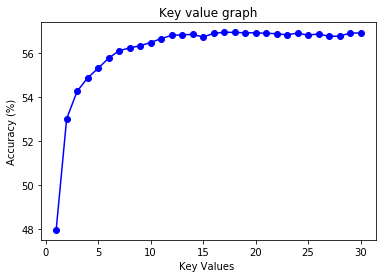

Our max accuracy:  56.94983351220452 % at k =  17


In [6]:
X = df.iloc[:,[0,3,8,10,12,13]].values
y = df.iloc[:, 15].values

start_knn(X,y)

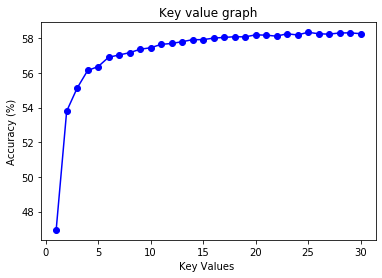

Our max accuracy:  58.33677316381849 % at k =  25


In [7]:
X = df.iloc[:,[0,3,8,10,12,13]].values
y = df.iloc[:, 16].values

start_knn(X,y)